In [1]:
from sympy import *
import numpy as np

In [5]:
# Load vector
x = Symbol('x')

l = Symbol('l', integer=True, positive=True)
print(integrate(x**2*sin(pi*l*x), (x, 0, 1)))

# l even
l = Symbol('l', integer=True, positive=True, even=True)
print("even: ", integrate(x**2*sin(pi*l*x), (x, 0, 1)))

# l odd
l = Symbol('l', integer=True, positive=True, odd=True)
print("odd:  ", integrate(x**2*sin(pi*l*x), (x, 0, 1)))

-(-1)**l/(pi*l) + 2*(-1)**l/(pi**3*l**3) - 2/(pi**3*l**3)
even:  -1/(pi*l)
odd:   1/(pi*l) - 4/(pi**3*l**3)


In [36]:
# Stiffness matrix

k = Symbol('k', integer=True, positive=True)
l = Symbol('l', integer=True, positive=True)
a = integrate(diff(sin(pi*k*x), x) * diff(sin(pi*l*x), x), (x, 0, 1))
a

Piecewise((0, Ne(k, l)), (pi**2*k*l/2, True))

u_h =  (-8/pi**5 + 2/pi**3)*sin(pi*x) - sin(2*pi*x)/(4*pi**3) + (-8/(243*pi**5) + 2/(27*pi**3))*sin(3*pi*x) - sin(4*pi*x)/(32*pi**3) + (-8/(3125*pi**5) + 2/(125*pi**3))*sin(5*pi*x) - sin(6*pi*x)/(108*pi**3) + (-8/(16807*pi**5) + 2/(343*pi**3))*sin(7*pi*x) - sin(8*pi*x)/(256*pi**3) + (-8/(59049*pi**5) + 2/(729*pi**3))*sin(9*pi*x) - sin(10*pi*x)/(500*pi**3)
u_ex =  -x**4/12 + x/12
L^2 error:  5.667931882438076e-05
L^\infty error:  [-0.00022397]


''

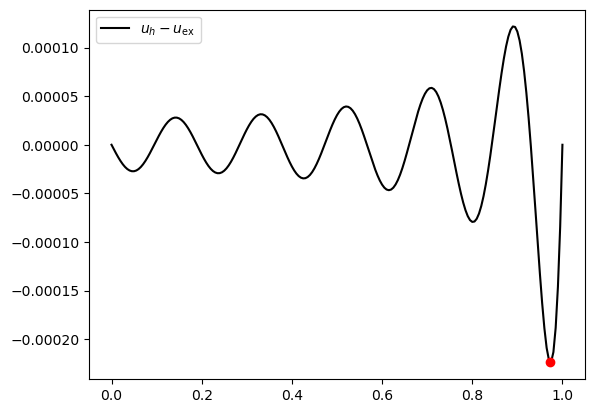

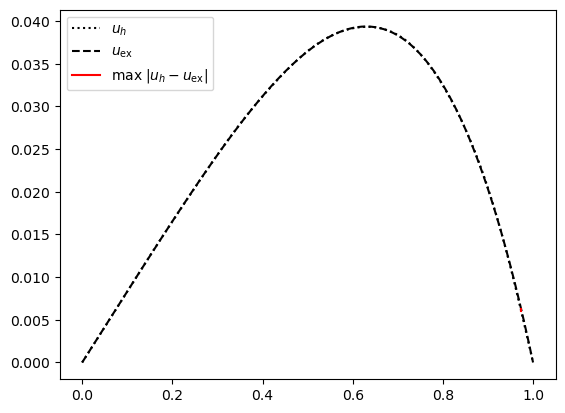

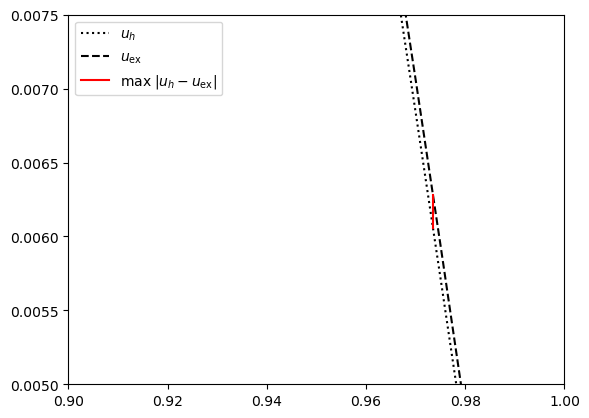

In [37]:
def u_k(k):
    
    if k % 2 == 0:
        return -2 / ( pi**3 * k**3 )
    else:
        return 2 / ( pi**3 * k**3 ) - 8 / ( pi**5 * k**5 )

x = Symbol('x')
u = sum(u_k(k) * sin(pi*k*x) for k in range(1, 10+1))
print("u_h = ", u)

u_ex = x / 12 - x**4 / 12
print("u_ex = ", u_ex)

f2 = lambdify(x, (u - u_ex)**2, "numpy")

from scipy.integrate import quadrature

L2err = np.sqrt(quadrature(f2, 0, 1, tol=1e-13)[0])

print("L^2 error: ", L2err)

f = lambdify(x, u - u_ex, "numpy")
fp = lambdify(x, diff(u - u_ex, x), "numpy")


from scipy.optimize import fsolve

ext_points = fsolve(fp, [0.95])

print("L^\infty error: ", f(ext_points))

import matplotlib.pyplot as plt

xx = np.linspace(0, 1, 201)

plt.figure()

plt.plot(xx, f(xx), 'k-', label=r"$u_h - u_\mathrm{ex}$")
plt.plot(ext_points, f(ext_points), 'ro')
plt.legend()

u_h_f = lambdify(x, u, "numpy")
u_ex_f = lambdify(x, u_ex, "numpy")

plt.figure()

plt.plot(xx, u_h_f(xx), 'k:', label=r"$u_h$")
plt.plot(xx, u_ex_f(xx), 'k--', label=r"$u_\mathrm{ex}$")
plt.plot([ext_points[0], ext_points[0]], [u_h_f(ext_points[0]), u_ex_f(ext_points[0])], 
         'r-', label=r"$\mathrm{max } \; | u_h - u_\mathrm{ex} | $")
plt.legend()

plt.figure()

plt.plot(xx, u_h_f(xx), 'k:', label=r"$u_h$")
plt.plot(xx, u_ex_f(xx), 'k--', label=r"$u_\mathrm{ex}$")
plt.plot([ext_points[0], ext_points[0]], [u_h_f(ext_points[0]), u_ex_f(ext_points[0])], 
         'r-', label=r"$\mathrm{max } \; | u_h - u_\mathrm{ex} | $")
plt.xlim(0.9, 1.0)
plt.ylim(0.005, 0.0075)
plt.legend()
;
